In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

# Total Cost - Phase 1

In [170]:
def fill_dataFrame_total(path, files):
    df_time = pd.DataFrame()
    df_prec = pd.DataFrame()
    df_conv = pd.DataFrame()
    for file in files:
        with open(os.path.join(path,file)) as f:
            col = "try_"+file.split('.')[0]
            for line in f:
                vals = line.split(' ')
                row = vals[1]+','+vals[2]
                
                try:
                    df_time.loc[row,col] += ' '+vals[3]
                except KeyError:
                    df_time.loc[row,col] = vals[3]
                except TypeError:
                    df_time.loc[row,col] = vals[3]
                    
                try:
                    df_prec.loc[row,col] += ' '+vals[4]
                except KeyError:
                    df_prec.loc[row,col] = vals[4]
                except TypeError:
                    df_prec.loc[row,col] = vals[4]
                
                try:
                    df_conv.loc[row,col] += ' '+vals[5][:-1]
                except KeyError:
                    df_conv.loc[row,col] = vals[5][:-1]
                except TypeError:
                    df_conv.loc[row,col] = vals[5][:-1]
            
    for i in range(len(df_time.index)):
        for j in range(len(df_time.columns)):
            df_time.iloc[i,j] = np.mean(list(map(float,df_time.iloc[i,j].split(' '))))
            
            df_prec.iloc[i,j] = np.mean(list(map(float,df_prec.iloc[i,j].split(' '))))
            
            lst = df_conv.iloc[i,j].split(' ')
            df_conv.iloc[i,j] = int(max(set(lst), key=lst.count))==1
            
    return df_time,df_prec,df_conv

In [171]:
def create_averageMatrix(df):
    surv_rate=["30%","40%","50%"]
    df_sep = pd.DataFrame()
    for idx, (name, row) in enumerate(df.iterrows()):
        idxs=name.split(',')
        df_sep.loc[idxs[0],surv_rate[idx%3]]=row.mean()
    return df_sep

## Sequential

In [172]:
path = "../results/total/phase1/sequential"
files = sorted(os.listdir(path))

In [173]:
df_seq_time,df_seq_prec,df_seq_conv = fill_dataFrame_total(path,files)
df_seq_avg=create_averageMatrix(df_seq_prec)

In [174]:
df_seq_time

,try_0,try_1,try_2
"3031,909",339.407,345.221,332.789
"3031,1212",345.294,348.365,299.753
"3031,1515",345.134,336.028,302.712
"3209,962",354.227,343.637,354.969
"3209,1283",363.904,343.562,367.816
"3209,1604",356.966,355.128,352.836
"3354,1006",398.041,391.581,398.465
"3354,1341",371.627,407.828,362.625
"3354,1677",345.003,366.146,372.692


In [175]:
df_seq_prec

,try_0,try_1,try_2
"3031,909",9931,10319,10385
"3031,1212",10841,11083,12276
"3031,1515",12025,12223,12794
"3209,962",10085,10575,9929
"3209,1283",11490,11154,11080
"3209,1604",11623,11928,12073
"3354,1006",9926,10321,9767
"3354,1341",10899,10452,11243
"3354,1677",12691,11858,12360


In [176]:
df_seq_conv

,try_0,try_1,try_2
"3031,909",True,True,True
"3031,1212",True,True,True
"3031,1515",True,True,True
"3209,962",True,True,True
"3209,1283",True,True,True
"3209,1604",True,True,True
"3354,1006",True,True,True
"3354,1341",True,True,True
"3354,1677",True,True,True


In [177]:
df_seq_avg

,30%,40%,50%
3031,10211.666667,11400.000000,12347.333333
3209,10196.333333,11241.333333,11874.666667
3354,10004.666667,10864.666667,12303.000000


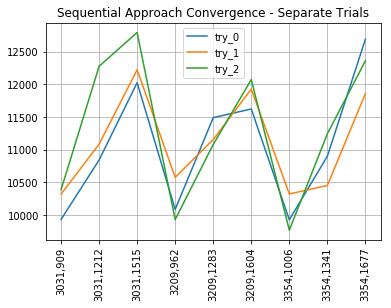

In [178]:
plt.plot(df_seq_prec)
plt.grid()
plt.legend(df_seq_prec.columns)
plt.xticks(rotation='vertical')
plt.title("Sequential Approach Convergence - Separate Trials");

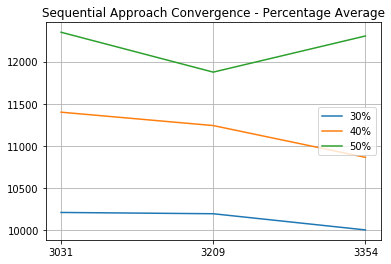

In [179]:
plt.plot(df_seq_avg)
plt.grid()
plt.legend(df_seq_avg.columns)
plt.title("Sequential Approach Convergence - Percentage Average");

## Parallel

In [180]:
path = "../results/total/phase1/parallel"
files = sorted(os.listdir(path))

In [181]:
df_par_time,df_par_prec,df_par_conv = fill_dataFrame_total(path,files)
df_par_avg=create_averageMatrix(df_par_prec)

In [182]:
df_par_time

,try_0,try_1,try_2
"3031,909",148.759,152.381,152.939
"3031,1212",143.996,146.483,152.194
"3031,1515",131.133,144.259,134.628
"3209,962",159.522,166.695,162.088
"3209,1283",159.903,171.817,163.489
"3209,1604",154.091,170.52,145.639
"3354,1006",173.596,177.165,186.892
"3354,1341",160.98,163.567,165.052
"3354,1677",164.264,163.924,159.343


In [183]:
df_par_prec

,try_0,try_1,try_2
"3031,909",10359,10264,9987
"3031,1212",11342,11340,11147
"3031,1515",12839,12203,12746
"3209,962",10312,10103,10100
"3209,1283",11263,11152,10772
"3209,1604",12079,11505,12687
"3354,1006",10232,10005,9873
"3354,1341",11824,11634,10784
"3354,1677",12144,12585,12273


In [184]:
df_par_conv

,try_0,try_1,try_2
"3031,909",True,True,True
"3031,1212",True,True,True
"3031,1515",True,True,True
"3209,962",True,True,True
"3209,1283",True,True,True
"3209,1604",True,True,True
"3354,1006",True,True,True
"3354,1341",True,True,True
"3354,1677",True,True,True


In [185]:
df_par_avg

,30%,40%,50%
3031,10203.333333,11276.333333,12596.000000
3209,10171.666667,11062.333333,12090.333333
3354,10036.666667,11414.000000,12334.000000


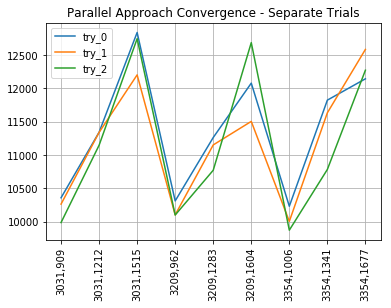

In [186]:
plt.plot(df_par_prec)
plt.grid()
plt.legend(df_par_prec.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel Approach Convergence - Separate Trials");

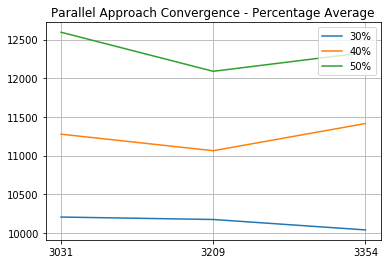

In [187]:
plt.plot(df_par_avg)
plt.grid()
plt.legend(df_par_avg.columns)
plt.title("Parallel Approach Convergence - Percentage Average");

## Parallel MPI

In [188]:
path = "../results/total/phase1/parallelMPI"
files = sorted(os.listdir(path))

In [189]:
df_mpi_time,df_mpi_prec,df_mpi_conv = fill_dataFrame_total(path,files)
df_mpi_avg=create_averageMatrix(df_mpi_prec)

In [190]:
df_mpi_time

,try_0,try_1,try_2
"3031,909",286.279,286.118,285.949
"3031,1212",265.851,266.002,265.715
"3031,1515",254.607,254.747,254.549
"3209,962",302.037,302.432,301.887
"3209,1283",286.189,286.212,286.13
"3209,1604",248.743,248.813,248.738
"3354,1006",306.958,306.884,306.744
"3354,1341",283.141,283.176,283.12
"3354,1677",260.309,260.341,260.143


In [191]:
df_mpi_prec

,try_0,try_1,try_2
"3031,909",7842.67,7918.33,7878.67
"3031,1212",8893.33,8801.67,8866.67
"3031,1515",9619,9741.67,9620.67
"3209,962",8162,8169.67,8219
"3209,1283",8751,8729.33,8625.33
"3209,1604",9910.67,10024,9917.67
"3354,1006",7937,7927.67,8022
"3354,1341",8887,8937.67,8978
"3354,1677",10279.7,10181.3,10245.7


In [192]:
df_mpi_conv

,try_0,try_1,try_2
"3031,909",True,True,True
"3031,1212",True,True,True
"3031,1515",True,True,True
"3209,962",True,True,True
"3209,1283",True,True,True
"3209,1604",True,True,True
"3354,1006",True,True,True
"3354,1341",True,True,True
"3354,1677",True,True,True


In [193]:
df_mpi_avg

,30%,40%,50%
3031,7879.888889,8853.888889,9660.444444
3209,8183.555556,8701.888889,9950.777778
3354,7962.222222,8934.222222,10235.555556


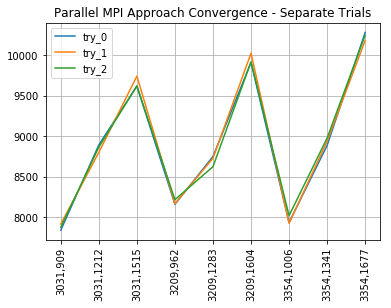

In [194]:
plt.plot(df_mpi_prec)
plt.grid()
plt.legend(df_mpi_prec.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel MPI Approach Convergence - Separate Trials");

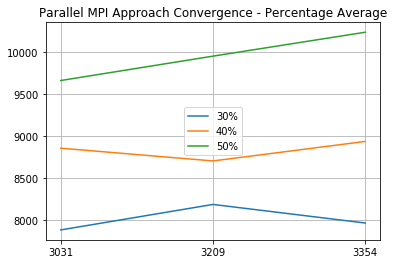

In [195]:
plt.plot(df_mpi_avg)
plt.grid()
plt.legend(df_mpi_avg.columns)
plt.title("Parallel MPI Approach Convergence - Percentage Average");

# Detailed Cost - Phase 3

In [146]:
def fill_dataFrame_detailed(path, files):
    df = pd.DataFrame()
    for file in files:
        with open(os.path.join(path,file)) as f:
            col = file.split('.')[0]
            for line in f:
                vals = line.split(' ')
                row = vals[0]+','+vals[1]+','+vals[2]
                try:
                    df.loc[row,col] += ' '+vals[3][:-1]
                except KeyError:
                    df.loc[row,col] = vals[3][:-1]
                except TypeError:
                    df.loc[row,col] = vals[3][:-1]
                    
    for i in range(len(df.index)):
        for j in range(len(df.columns)):
            df.iloc[i,j] = np.mean(list(map(float,df.iloc[i,j].split(' '))))
            
    return df

## Sequential

In [147]:
path = "../results/detailed/sequential"
genFiles = sorted([i for i in os.listdir(path) if "generation" in i])
pathFiles = sorted([i for i in os.listdir(path) if "path" in i])
rearrFiles = sorted([i for i in os.listdir(path) if "rearrange" in i])
sortFiles = sorted([i for i in os.listdir(path) if "sort" in i])

In [148]:
df_gen = fill_dataFrame_detailed(path,genFiles)
df_gen

,generation_0,generation_1,generation_2
"100,185,55",0.00053872,0.000542355,0.00055245
"200,442,132",0.00405712,0.00381803,0.00385682
"300,726,217",0.0109459,0.0112828,0.0112475
"400,1026,307",0.0227483,0.0227531,0.0226499
"500,1340,402",0.0384706,0.0387441,0.0389773
"600,1663,498",0.0606415,0.0602998,0.0599638
"700,1995,598",0.0875945,0.0852998,0.0861798
"800,2334,700",0.118472,0.117736,0.118613
"900,2680,804",0.156536,0.156089,0.156017
"1000,3031,909",0.199496,0.19969,0.200161


In [149]:
df_path = fill_dataFrame_detailed(path,pathFiles)
df_path

,path_0,path_1,path_2
"100,185,55",2.81188e-05,2.83267e-05,2.8698e-05
"200,442,132",0.000132124,0.000131069,0.000139406
"300,726,217",0.000348371,0.000351282,0.000387238
"400,1026,307",0.000686975,0.00069203,0.000743059
"500,1340,402",0.00114513,0.00114935,0.00125975
"600,1663,498",0.00175179,0.0017515,0.0019221
"700,1995,598",0.00245656,0.002453,0.00268362
"800,2334,700",0.00329859,0.00338783,0.00358722
"900,2680,804",0.00451663,0.00440282,0.00468657
"1000,3031,909",0.00568292,0.00562951,0.00621759


In [150]:
df_rearr = fill_dataFrame_detailed(path, rearrFiles)
df_rearr

,rearrange_0,rearrange_1,rearrange_2
"100,185,55",1.07921e-06,1.08911e-06,1.10891e-06
"200,442,132",7.21782e-06,7.27228e-06,7.26238e-06
"300,726,217",1.91089e-05,1.90446e-05,1.99703e-05
"400,1026,307",3.56337e-05,3.66881e-05,3.55891e-05
"500,1340,402",5.93267e-05,5.93663e-05,6.13515e-05
"600,1663,498",8.84109e-05,8.97525e-05,9.40248e-05
"700,1995,598",0.000126698,0.00012648,0.000129985
"800,2334,700",0.000177079,0.000180965,0.000179901
"900,2680,804",0.000267564,0.000265842,0.000273881
"1000,3031,909",0.000405153,0.000399619,0.00040595


In [151]:
df_sort = fill_dataFrame_detailed(path, sortFiles)
df_sort

,sort_0,sort_1,sort_2
"100,185,55",9.84158e-06,9.81188e-06,9.88119e-06
"200,442,132",2.44406e-05,2.42228e-05,2.43168e-05
"300,726,217",4.14851e-05,4.15545e-05,4.16881e-05
"400,1026,307",5.85891e-05,5.86089e-05,5.87772e-05
"500,1340,402",7.85297e-05,7.85842e-05,7.86535e-05
"600,1663,498",9.67376e-05,9.65495e-05,9.68515e-05
"700,1995,598",0.000117188,0.000117233,0.000117911
"800,2334,700",0.000139248,0.000139163,0.000139441
"900,2680,804",0.000160762,0.000161342,0.000161946
"1000,3031,909",0.000182752,0.000182629,0.000183109


## Parallel

In [152]:
path = "../results/detailed/parallel"
genFiles = sorted([i for i in os.listdir(path) if "generation" in i])
pathFiles = sorted([i for i in os.listdir(path) if "path" in i])
rearrFiles = sorted([i for i in os.listdir(path) if "rearrange" in i])
sortFiles = sorted([i for i in os.listdir(path) if "sort" in i])

In [153]:
df_gen = fill_dataFrame_detailed(path,genFiles)
df_gen

,generation_0,generation_1,generation_2
"100,185,55",0.000496625,0.00050481,0.000455035
"200,442,132",0.00216713,0.00217511,0.00192143
"300,726,217",0.00549237,0.00548395,0.0046064
"400,1026,307",0.0104494,0.0102252,0.00859596
"500,1340,402",0.0172126,0.017856,0.0138821
"600,1663,498",0.0261339,0.0262423,0.0209662
"700,1995,598",0.0366186,0.0368301,0.0298856
"800,2334,700",0.0506271,0.0501153,0.0394956
"900,2680,804",0.0644419,0.0668098,0.0508226
"1000,3031,909",0.0898282,0.0833259,0.0647957


In [154]:
df_path = fill_dataFrame_detailed(path, pathFiles)
df_path

,path_0,path_1,path_2
"100,185,55",4.75644e-05,4.8698e-05,7.04703e-05
"200,442,132",6.15099e-05,6.25347e-05,4.51931e-05
"300,726,217",9.25248e-05,9.3198e-05,7.74851e-05
"400,1026,307",0.000146693,0.000146119,0.000108896
"500,1340,402",0.000213238,0.000209762,0.000167896
"600,1663,498",0.000321124,0.00031705,0.000227936
"700,1995,598",0.000423535,0.000416861,0.000428208
"800,2334,700",0.000560822,0.00056954,0.000564292
"900,2680,804",0.000672045,0.00072546,0.000533045
"1000,3031,909",0.000921183,0.000928871,0.000782059


In [155]:
df_rearr = fill_dataFrame_detailed(path, rearrFiles)
df_rearr

,rearrange_0,rearrange_1,rearrange_2
"100,185,55",6.28218e-06,5.90594e-06,7.4703e-06
"200,442,132",3.10594e-05,2.87129e-05,3.27228e-05
"300,726,217",7.64059e-05,7.4203e-05,8.15297e-05
"400,1026,307",0.000141124,0.000142312,0.000147411
"500,1340,402",0.000231634,0.000231441,0.000244579
"600,1663,498",0.000352149,0.000341406,0.000345391
"700,1995,598",0.000469282,0.000467376,0.000470748
"800,2334,700",0.000596505,0.000593332,0.000607109
"900,2680,804",0.000752465,0.000741129,0.000781064
"1000,3031,909",0.000907203,0.000905351,0.000971257


In [156]:
df_sort = fill_dataFrame_detailed(path, sortFiles)
df_sort

,sort_0,sort_1,sort_2
"100,185,55",0.000152614,0.000153832,0.000439129
"200,442,132",0.00015449,0.000161698,0.000392614
"300,726,217",0.000179218,0.000168223,0.000406371
"400,1026,307",0.000234114,0.000238584,0.000433545
"500,1340,402",0.000327054,0.000416322,0.000485376
"600,1663,498",0.000617881,0.000574198,0.00040549
"700,1995,598",0.00083401,0.000799847,0.000426782
"800,2334,700",0.000975045,0.000984282,0.00047745
"900,2680,804",0.00118755,0.00110577,0.000497837
"1000,3031,909",0.000890856,0.000944847,0.000551589


## Parallel MPI

In [157]:
path = "../results/detailed/parallelMPI"
genFiles = sorted([i for i in os.listdir(path) if "generation" in i])
pathFiles = sorted([i for i in os.listdir(path) if "path" in i])
rearrFiles = sorted([i for i in os.listdir(path) if "rearrange" in i])
sortFiles = sorted([i for i in os.listdir(path) if "sort" in i])
transFiles = sorted([i for i in os.listdir(path) if "transfer" in i])

In [158]:
df_gen = fill_dataFrame_detailed(path, genFiles)
df_gen

,generation_0,generation_1,generation_2
"100,185,55",0.000497437,0.00050075,0.000450107
"200,442,132",0.00217588,0.00219661,0.00191739
"300,726,217",0.00546987,0.00550258,0.00456515
"400,1026,307",0.0104982,0.0106344,0.00850748
"500,1340,402",0.0175492,0.0173896,0.013928
"600,1663,498",0.0264742,0.0262252,0.0211152
"700,1995,598",0.0375346,0.0368332,0.0295602
"800,2334,700",0.0504538,0.0510003,0.0400172
"900,2680,804",0.0662523,0.0676885,0.0513333
"1000,3031,909",0.0855874,0.0853751,0.0658547


In [159]:
df_path = fill_dataFrame_detailed(path, pathFiles)
df_path

,path_0,path_1,path_2
"100,185,55",4.79191e-05,4.87954e-05,4.6764e-05
"200,442,132",6.17162e-05,6.12178e-05,6.07937e-05
"300,726,217",9.30017e-05,9.27624e-05,7.66815e-05
"400,1026,307",0.000149277,0.000144422,0.000121073
"500,1340,402",0.000213178,0.000211493,0.000184635
"600,1663,498",0.000312668,0.000317304,0.000266617
"700,1995,598",0.000419302,0.000424728,0.000379937
"800,2334,700",0.000584554,0.000572076,0.000628904
"900,2680,804",0.000693294,0.000722243,0.000895281
"1000,3031,909",0.000905422,0.000906332,0.000785715


In [160]:
df_rearr = fill_dataFrame_detailed(path, rearrFiles)
df_rearr

,rearrange_0,rearrange_1,rearrange_2
"100,185,55",6.25743e-06,6.16502e-06,7.13531e-06
"200,442,132",3.0099e-05,2.91155e-05,3.26733e-05
"300,726,217",7.61584e-05,7.55611e-05,7.92409e-05
"400,1026,307",0.000145896,0.000140884,0.000147596
"500,1340,402",0.000236884,0.000233541,0.000243366
"600,1663,498",0.000345898,0.000341591,0.000346215
"700,1995,598",0.000464523,0.000474995,0.000476219
"800,2334,700",0.000601284,0.000600535,0.000595406
"900,2680,804",0.000748733,0.000741386,0.000742163
"1000,3031,909",0.00090249,0.000900969,0.000943172


In [161]:
df_sort = fill_dataFrame_detailed(path, sortFiles)
df_sort

,sort_0,sort_1,sort_2
"100,185,55",0.000150403,0.000149827,0.000411021
"200,442,132",0.000156658,0.000152936,0.000418305
"300,726,217",0.00017932,0.000171759,0.000468672
"400,1026,307",0.00021354,0.000233304,0.000416454
"500,1340,402",0.000365325,0.000386723,0.000428558
"600,1663,498",0.000613444,0.00057536,0.000439259
"700,1995,598",0.000835018,0.0008508,0.000488066
"800,2334,700",0.000915158,0.000998097,0.000451548
"900,2680,804",0.000991535,0.00108451,0.000536764
"1000,3031,909",0.000851026,0.00079895,0.000546868


In [162]:
df_trans = fill_dataFrame_detailed(path, transFiles)
df_trans

,transfer_0,transfer_1,transfer_2
"100,185,55",0.00486426,0.00479885,0.00288444
"200,442,132",0.00447363,0.00432726,0.00345426
"300,726,217",0.00349778,0.00334278,0.00872296
"400,1026,307",0.00462452,0.0033623,0.0225733
"500,1340,402",0.00432433,0.00629444,0.0394673
"600,1663,498",0.00674763,0.00589848,0.0642171
"700,1995,598",0.00359174,0.00940107,0.088293
"800,2334,700",0.0139993,0.00694359,0.118598
"900,2680,804",0.0223527,0.00303637,0.179908
"1000,3031,909",0.0155283,0.0159263,0.216617
